In [41]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para métricas
import scipy 
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

# Recipe Discovery: High Traffic
## Objective
The aim of this work is to analyze the traffic of different recipes to predict which ones will generate high traffic and which will maintain high traffic 80% of the time.
## Context and business problem
The core challenge Tasty Bytes faces revolves around identifying recipes that generate higher web traffic. The correlation between increased traffic and potential subscribers is pivotal for the company's growth. Therefore, deciphering which recipes attract more traffic is instrumental in boosting subscription rates, a key aspect of the company's business model.
## Analytical context
The product manager has tried to make this easier for us and provided data for each recipe, as well as whether there was high traffic when the recipe was featured on the home page.

In [42]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/xlisouski/Project_DC/main/recipe_site_traffic_2212.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Description of available variables
- **recipe:** Numeric, unique identifier of recipe
- **calories:** Numeric, number of calories
- **carbohydrate:** Numeric, amount of carbohydrates in grams
- **sugar:** Numeric, amount of sugar in grams
- **protein:** Numeric, amount of protein in grams
- **category:** Character, type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal').
- **servings:** Numeric, number of servings for the recipe
- **high_traffic:** Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”.

# Data Validation 
The first step involves verifying, cleaning, and ensuring the integrity of the data before its use. This includes checking data consistency, identifying outliers or errors, handling missing data, ensuring measurement accuracy, and confirming that the data aligns with the requirements and expectations of the proposed analysis. Data validation is crucial for obtaining accurate and reliable results in any data science project, as poor-quality data can lead to incorrect or imprecise conclusions.

In [43]:
# recipe
# It is an integer, is OK.
print(df['recipe'].info())
# There aren't missing values
print(df['recipe'].isnull().sum())
# There aren't duplicated values
print(df['recipe'].duplicated().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: recipe
Non-Null Count  Dtype
--------------  -----
947 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB
None
0
0


In [44]:
# calories
# It is a float, is OK.
print(df['calories'].info())
print('')
print(df['calories'].describe())
# There are 52 missing values
print('Missing Values:')
print(df['calories'].isnull().sum())
print('')
# The empty values are filled with the median.
median_calories = df['calories'].median()
df['calories'] = df['calories'].fillna(median_calories)
print('Missing Values replaced:')
print(df['calories'].isnull().sum())


<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: calories
Non-Null Count  Dtype  
--------------  -----  
895 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB
None

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64
Missing Values:
52

Missing Values replaced:
0


In [45]:
# carbohydrate
# It is a float, is OK.
print(df['carbohydrate'].info())
print('')
print(df['carbohydrate'].describe())
# There are 52 missing values
print('Missing Values:')
print(df['carbohydrate'].isnull().sum())
print('')
# The empty values are filled with the median.
median_carbohydrate = df['carbohydrate'].median()
df['carbohydrate'] = df['carbohydrate'].fillna(median_carbohydrate)
print('Missing Values replaced:')
print(df['carbohydrate'].isnull().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: carbohydrate
Non-Null Count  Dtype  
--------------  -----  
895 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB
None

count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64
Missing Values:
52

Missing Values replaced:
0


In [46]:
# sugar
# It is a float, is OK.
print(df['sugar'].info())
print('')
print(df['sugar'].describe())
# There are 52 missing values
print('Missing Values:')
print(df['sugar'].isnull().sum())
print('')
# The empty values are filled with the median.
median_sugar = df['sugar'].median()
df['sugar'] = df['sugar'].fillna(median_sugar)
print('Missing Values replaced:')
print(df['sugar'].isnull().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: sugar
Non-Null Count  Dtype  
--------------  -----  
895 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB
None

count    895.000000
mean       9.046547
std       14.679176
min        0.010000
25%        1.690000
50%        4.550000
75%        9.800000
max      148.750000
Name: sugar, dtype: float64
Missing Values:
52

Missing Values replaced:
0


In [47]:
# protein
# It is a float, is OK.
print(df['protein'].info())
print('')
print(df['protein'].describe())
# There are 52 missing values
print('Missing Values:')
print(df['protein'].isnull().sum())
print('')
# The empty values are filled with the median.
median_protein = df['protein'].median()
df['protein'] = df['protein'].fillna(median_protein)
print('Missing Values replaced:')
print(df['protein'].isnull().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: protein
Non-Null Count  Dtype  
--------------  -----  
895 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB
None

count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64
Missing Values:
52

Missing Values replaced:
0


In [48]:
# category
# It is an object, is OK.
print(df['category'].info())
print('')
print(df['category'].describe())
# The categories are ok
df['category'].value_counts()
# There aren't missing values
print('Missing Values:')
print(df['category'].isnull().sum())
print('')

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
947 non-null    object
dtypes: object(1)
memory usage: 7.5+ KB
None

count           947
unique           11
top       Breakfast
freq            106
Name: category, dtype: object
Missing Values:
0



In [49]:
# servings
# It is an object. It is necessary to convert in numeric. 
print(df['servings'].info())
print('')
print(df['servings'].describe())
# First, investigate what kind of values exists in the column
df['servings'].value_counts()
# Next, extract the number
import re
df['servings'] = df['servings'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if re.findall(r'\d+', str(x)) else None)
df['servings'] = df['servings'].astype(float)
# Validation
print(df['servings'].info())
print('')
print(df['servings'].describe())
# There aren't missing values
print('Missing Values:')
print(df['servings'].isnull().sum())
print('')

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: servings
Non-Null Count  Dtype 
--------------  ----- 
947 non-null    object
dtypes: object(1)
memory usage: 7.5+ KB
None

count     947
unique      6
top         4
freq      389
Name: servings, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: servings
Non-Null Count  Dtype  
--------------  -----  
947 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB
None

count    947.000000
mean       3.477297
std        1.732741
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: servings, dtype: float64
Missing Values:
0



In [50]:
# high_traffic
# It is an object, is OK.
print(df['high_traffic'].info())
print('')
print(df['high_traffic'].describe())
# Categories are ok
df['high_traffic'].value_counts()
# There aren 373 missing values
print('Missing Values:')
print(df['high_traffic'].isnull().sum())
print('')

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: high_traffic
Non-Null Count  Dtype 
--------------  ----- 
574 non-null    object
dtypes: object(1)
memory usage: 7.5+ KB
None

count      574
unique       1
top       High
freq       574
Name: high_traffic, dtype: object
Missing Values:
373



In [51]:
# Create the target variable
import numpy as np
df['hight_traffic_target'] = np.where(df['high_traffic'] == 'High',1,0)
df['hight_traffic_target'].value_counts()

1    574
0    373
Name: hight_traffic_target, dtype: int64

# Exploratory Analysis
The next stage involves understanding the quality, structure, and potential relationships among variables in a dataset through exploratory data analysis. This stage lays the groundwork for decision-making in subsequent steps of the data analysis and modeling process.

## Univariate analysis

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

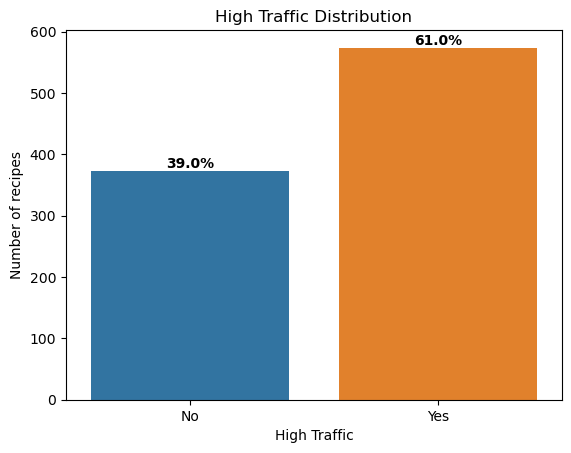

In [53]:
# Target univariate analysis
cantidad = len(df['hight_traffic_target'])

sns.countplot(data = df,
              x = "hight_traffic_target")
plt.xlabel('High Traffic')
plt.ylabel('Number of recipes')
plt.title('High Traffic Distribution')
valores_x_originales = [0,1]
valores_x_nuevos = ['No', 'Yes']
plt.xticks(valores_x_originales, valores_x_nuevos)
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

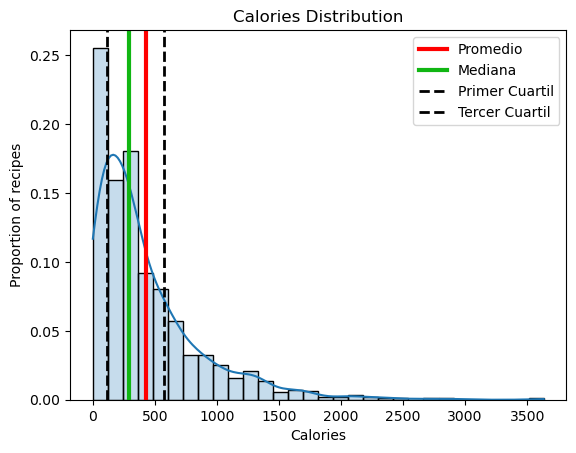

In [54]:
# calories Histogram
# metrics
variable_study = df['calories']
media = variable_study.mean()
mediana = variable_study.median()
primer_cuartil = variable_study.quantile(0.25)
tercer_cuartil = variable_study.quantile(0.75)

# grafic
plt.figure()

sns.histplot(data = df,
             x = 'calories',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# mean line
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# median line
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Q1 line
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Q3 line
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Proportion of recipes')
plt.show()

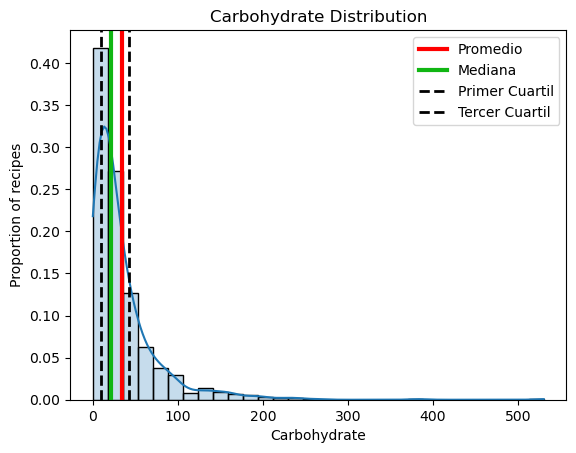

In [55]:
# carbohydrate Histogram
# metrics
variable_study = df['carbohydrate']
media = variable_study.mean()
mediana = variable_study.median()
primer_cuartil = variable_study.quantile(0.25)
tercer_cuartil = variable_study.quantile(0.75)

# grafic
plt.figure()

sns.histplot(data = df,
             x = 'carbohydrate',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# mean line
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# median line
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Q1 line
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Q3 line
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Carbohydrate Distribution')
plt.xlabel('Carbohydrate')
plt.ylabel('Proportion of recipes')
plt.show()

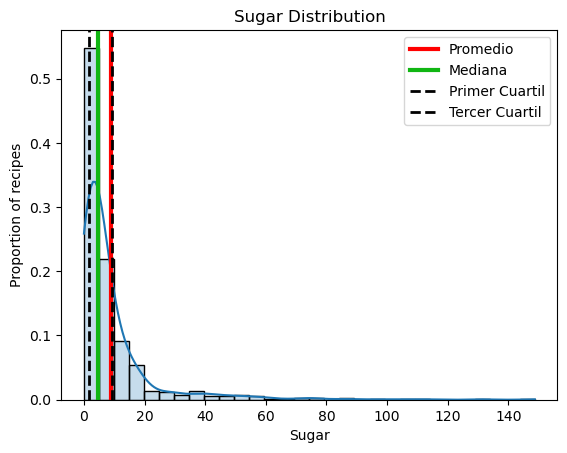

In [56]:
# sugar  Histogram
# metrics
variable_study = df['sugar']
media = variable_study.mean()
mediana = variable_study.median()
primer_cuartil = variable_study.quantile(0.25)
tercer_cuartil = variable_study.quantile(0.75)

# grafic
plt.figure()

sns.histplot(data = df,
             x = 'sugar',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# mean line
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# median line
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Q1 line
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Q3 line
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Sugar Distribution')
plt.xlabel('Sugar')
plt.ylabel('Proportion of recipes')
plt.show()

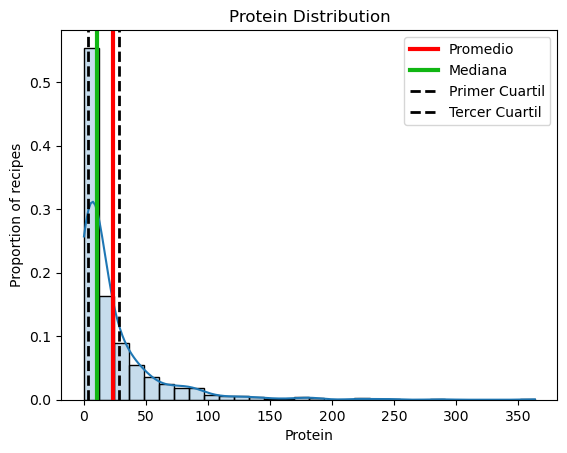

In [57]:
# protein  Histogram
# metrics
variable_study = df['protein']
media = variable_study.mean()
mediana = variable_study.median()
primer_cuartil = variable_study.quantile(0.25)
tercer_cuartil = variable_study.quantile(0.75)

# grafic
plt.figure()

sns.histplot(data = df,
             x = 'protein',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# mean line
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# median line
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Q1 line
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Q3 line
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Protein Distribution')
plt.xlabel('Protein')
plt.ylabel('Proportion of recipes')
plt.show()

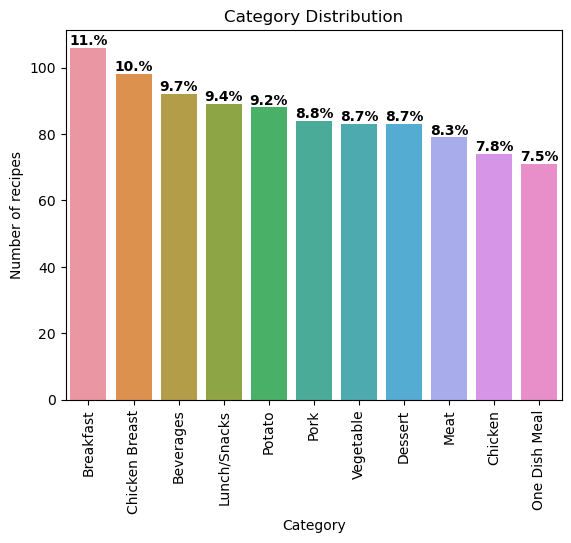

In [58]:
# Category analysis
cantidad = len(df['category'])
orden = df['category'].value_counts().index

sns.countplot(data = df,
              x = "category",
              order=orden)
plt.xlabel('Category')
plt.ylabel('Number of recipes')
plt.title('Category Distribution')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,4) * 100)[0:3]}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

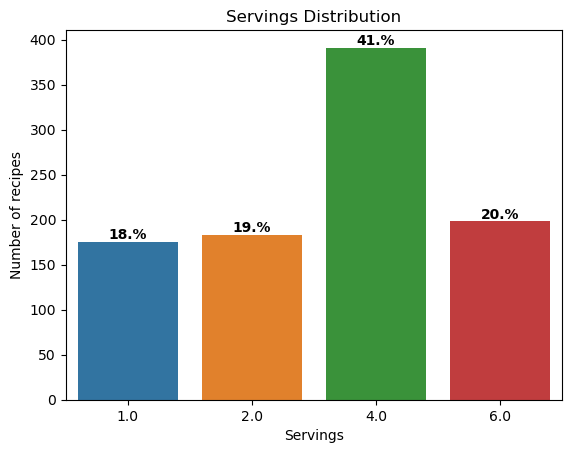

In [59]:
# Category analysis
cantidad = len(df['servings'])

sns.countplot(data = df,
              x = "servings")
plt.xlabel('Servings')
plt.ylabel('Number of recipes')
plt.title('Servings Distribution')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,4) * 100)[0:3]}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

## Bivariate analysis

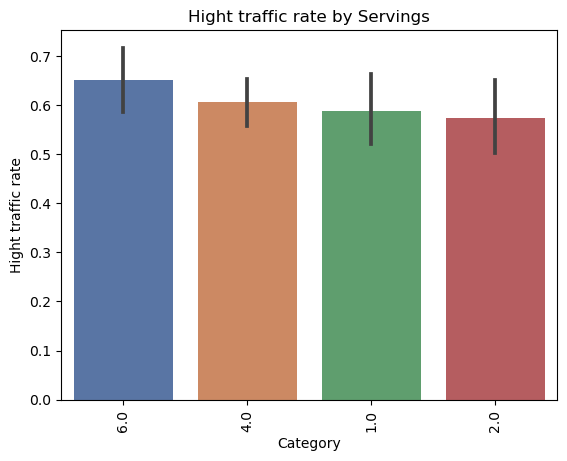

In [60]:
# Servings vs target
orden = df.groupby('servings').agg(     
    ht_rate = ('hight_traffic_target', 'mean')
)
orden = orden.sort_values('ht_rate',ascending = False)
orden = orden.index

sns.barplot(data = df,
            x = 'servings',
            y = 'hight_traffic_target',
            order=orden,
           palette = 'deep')
plt.xlabel('Category')
plt.ylabel('Hight traffic rate')
plt.title('Hight traffic rate by Servings')
plt.xticks(rotation=90)
plt.show()

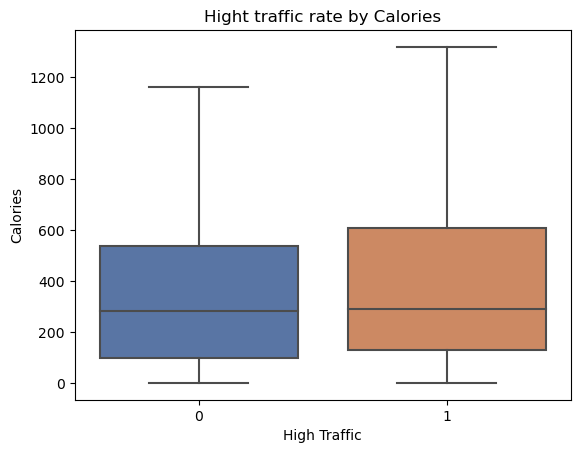

In [61]:
# calories vs target
plt.figure()
sns.boxplot(data = df,
            x = 'hight_traffic_target',
            y = 'calories', 
            showfliers = False,
           palette = 'deep')
plt.xlabel('High Traffic')
plt.ylabel('Calories')
plt.title('Hight traffic rate by Calories')
plt.show()

<Figure size 640x480 with 0 Axes>

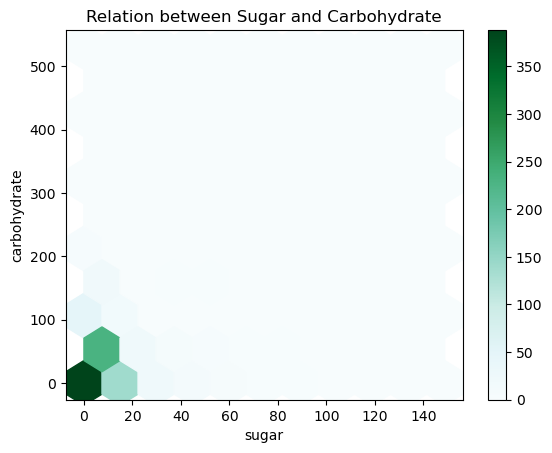

In [62]:
# sugar vs carbohydrate
plt.figure()
df.plot.hexbin(x ='sugar', y = 'carbohydrate', 
               gridsize = 10)
plt.title('Relation between Sugar and Carbohydrate')
plt.show()

<Figure size 640x480 with 0 Axes>

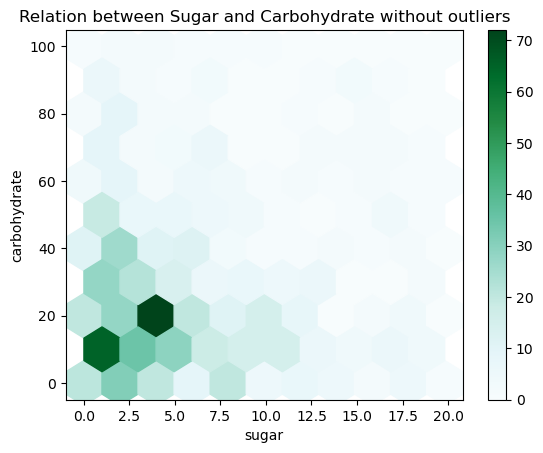

In [63]:
# sugar vs carbohydrate
df_2 = df.loc[(df['sugar'] < 20) & (df['carbohydrate'] < 100),]
plt.figure()
df_2.plot.hexbin(x ='sugar', y = 'carbohydrate', 
               gridsize = 10)
plt.title('Relation between Sugar and Carbohydrate without outliers')
plt.show()

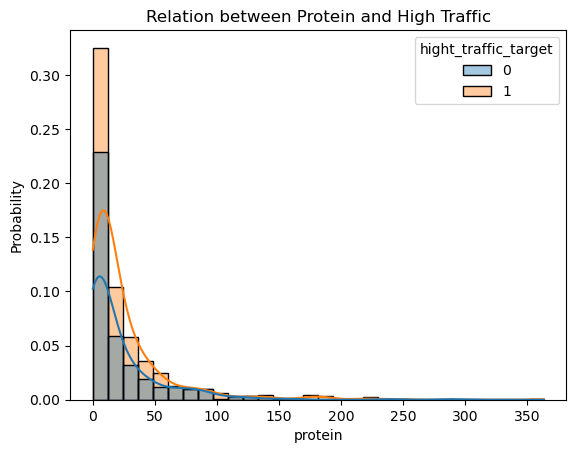

In [64]:
plt.figure()

sns.histplot(data = df,
             x = 'protein',             
             hue = 'hight_traffic_target', 
             bins = 30,            
             alpha = 0.4,
             kde = True,
             stat='probability')

plt.title('Relation between Protein and High Traffic')
plt.show()

## Findings
- The 61% of the recipes have high traffic.
- The features calories, carbohydrate, sugar and protein have a positively skewed distribution, with very high outlier values. It may be necessary to address these outliers before using a machine learning model.
- Most recipes are for 4 servings.
- The high traffic rate varies significantly depending on the recipe category. Recipes involving vegetables, potatoes, and pork tend to have the highest proportion of high traffic.
- There are no significant differences in the high traffic rate based on the number of servings.
- There doesn't seem to be a significant difference in the traffic level based on the recipe's calorie count.
- Most of the recipes have low levels of sugar and carbohydrates.
- Recipes with lower protein content tend to have higher rates of high traffic.

# Model Development
Given the presence of a target variable, this is a supervised learning problem. In this case, the variable to predict is of binary nature, requiring the selection of a classification algorithm. For the development, the 'Logistic Regression' algorithm will be employed, which yields success probabilities as output. For the Comparative model, the XGBoost algoorithm will be used. 

## Test and Train Split

In [65]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,
                                    test_size = 0.2, 
                                    random_state = 43) 
# Test and train target mean are the same?
print('Train Mean: ')
print(df_train['hight_traffic_target'].mean())
print('Test Mean: ')
print(df_test['hight_traffic_target'].mean())

Train Mean: 
0.6063408190224571
Test Mean: 
0.6052631578947368


## Feature Engineering

In [66]:
# Rate by category 
rate_category = df_train.groupby(['category']).agg(
    rate_category = ('hight_traffic_target', 'mean')
).reset_index()
rate_category = rate_category.round(4)
df_train = df_train.merge(rate_category[['category','rate_category']],
              left_on = 'category',
              right_on = 'category',
              how = 'left')
df_test = df_test.merge(rate_category[['category','rate_category']],
              left_on = 'category',
              right_on = 'category',
              how = 'left')

In [67]:
# calories_log
df_train['calories_LOG'] = np.log(df_train['calories'])
df_test['calories_LOG'] = np.log(df_test['calories'])

# carbohydrate_log
df_train['carbohydrate_LOG'] = np.log(df_train['carbohydrate'])
df_test['carbohydrate_LOG'] = np.log(df_test['carbohydrate'])

# sugar_log
df_train['sugar_LOG'] = np.log(df_train['sugar'])
df_test['sugar_LOG'] = np.log(df_test['sugar'])

# protein_log
df_train['protein_LOG'] = np.log(df_train['protein'])
df_test['protein_LOG'] = np.log(df_test['protein'])

# calories_servings
df_train['calories_servings'] = df_train['calories'] / df_train['servings']
df_test['calories_servings'] = df_test['calories'] / df_test['servings']

# carbohydrate_servings
df_train['carbohydrate_servings'] = df_train['carbohydrate'] / df_train['servings']
df_test['carbohydrate_servings'] = df_test['carbohydrate'] / df_test['servings']

# category_vegetable
df_train['category_vegetable'] = np.where(df_train['category'] == 'Vegetable',1,0)
df_test['category_vegetable'] = np.where(df_test['category'] == 'Vegetable',1,0)

# category_Potato
df_train['category_Potato'] = np.where(df_train['category'] == 'Potato',1,0)
df_test['category_Potato'] = np.where(df_test['category'] == 'Potato',1,0)

# category_Pork
df_train['category_Pork'] = np.where(df_train['category'] == 'Pork',1,0)
df_test['category_Pork'] = np.where(df_test['category'] == 'Pork',1,0)

# category_Meat
df_train['category_Meat'] = np.where(df_train['category'] == 'Meat',1,0)
df_test['category_Meat'] = np.where(df_test['category'] == 'Meat',1,0)

# category_Dessert
df_train['category_Dessert'] = np.where(df_train['category'] == 'Dessert',1,0)
df_test['category_Dessert'] = np.where(df_test['category'] == 'Dessert',1,0)

# category_Chicken
df_train['category_Chicken'] = np.where(df_train['category'] == 'Chicken',1,0)
df_test['category_Chicken'] = np.where(df_test['category'] == 'Chicken',1,0)

# category_Breakfast
df_train['category_Breakfast'] = np.where(df_train['category'] == 'Breakfast',1,0)
df_test['category_Breakfast'] = np.where(df_test['category'] == 'Breakfast',1,0)

# category_Beverages
df_train['category_Beverages'] = np.where(df_train['category'] == 'Beverages',1,0)
df_test['category_Beverages'] = np.where(df_test['category'] == 'Beverages',1,0)

# category_LunchSnacks
df_train['category_LunchSnacks'] = np.where(df_train['category'] == 'Lunch/Snacks',1,0)
df_test['category_LunchSnacks'] = np.where(df_test['category'] == 'Lunch/Snacks',1,0)

# category_OneDishMeal
df_train['category_OneDishMeal'] = np.where(df_train['category'] == 'One Dish Meal',1,0)
df_test['category_OneDishMeal'] = np.where(df_test['category'] == 'One Dish Meal',1,0)

# servings_more_6
df_train['servings_more_6'] = np.where(df_train['servings'] >= 6,1,0)
df_test['servings_more_6'] = np.where(df_test['servings'] >= 6,1,0)

C:\Users\usernosis\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Baseline model

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "hight_traffic_target ~  category_vegetable + category_Beverages + category_Chicken + category_Breakfast + category_Pork + category_Potato + protein_LOG"
reg_log = smf.logit(formula, data = df_train).fit()

# Ver coeficientes y p valores
coeficientes = reg_log.params
pvalores = reg_log.pvalues
print("")
print("Coefficients:")
print(coeficientes.round(4))
print("")
print("P-Values:")
print(pvalores.round(6))

         Current function value: 0.476935
         Iterations: 35

Coefficients:
Intercept              0.7416
category_vegetable    25.5350
category_Beverages    -3.9737
category_Chicken      -0.9766
category_Breakfast    -1.4798
category_Pork          1.7383
category_Potato        2.1875
protein_LOG           -0.0838
dtype: float64

P-Values:
Intercept             0.000660
category_vegetable    0.999650
category_Beverages    0.000000
category_Chicken      0.000903
category_Breakfast    0.000000
category_Pork         0.000029
category_Potato       0.000038
protein_LOG           0.233028
dtype: float64


C:\Users\usernosis\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Comparision Model

In [69]:
import xgboost as xgb
X_train = df_train[['rate_category','calories_LOG','carbohydrate_LOG', 'sugar_LOG', 'protein_LOG',
       'calories_servings', 'carbohydrate_servings', 'category_vegetable',
       'category_Potato', 'category_Pork', 'category_Meat', 'category_Dessert',
       'category_Chicken', 'category_Breakfast', 'category_Beverages',
       'category_LunchSnacks', 'category_OneDishMeal', 'servings_more_6','calories', 'carbohydrate', 'sugar', 'protein',
       'servings']]
y_train = df_train['hight_traffic_target']
X_test = df_test[['rate_category','calories_LOG','carbohydrate_LOG', 'sugar_LOG', 'protein_LOG',
       'calories_servings', 'carbohydrate_servings', 'category_vegetable',
       'category_Potato', 'category_Pork', 'category_Meat', 'category_Dessert',
       'category_Chicken', 'category_Breakfast', 'category_Beverages',
       'category_LunchSnacks', 'category_OneDishMeal', 'servings_more_6','calories', 'carbohydrate', 'sugar', 'protein',
       'servings']]
y_test = df_test['hight_traffic_target']

model_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                              colsample_bytree = 0.3, 
                              learning_rate = 0.17,
                              max_depth = 7, 
                              alpha = 10, 
                              n_estimators = 180,
                              eval_metric='error',
                              seed = 4)

# Entrena el modelo
model_xgb.fit(X_train, y_train)


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, ...)

# Model Evaluation
To assess the predictive power of both models, the following metrics will be used:
- AUC
- Accurancy
- Recall
- F1 Score

## Predictions

In [70]:
df_train['Pred_1'] = reg_log.predict(df_train)
df_test['Pred_1'] = reg_log.predict(df_test)

df_train['Clas_1'] = np.where(df_train['Pred_1'] >= 0.5,1,0)
df_test['Clas_1'] = np.where(df_test['Pred_1'] >= 0.5,1,0)
df_train['Clas_2'] = model_xgb.predict(X_train)
df_test['Clas_2'] = model_xgb.predict(X_test)

## Baseline Model

In [71]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, f1_score

y_true = df_test['hight_traffic_target']
y_pred = df_test['Clas_1'] 

accuracy_1 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy_1)

recall_1 = recall_score(y_true, y_pred)
print("Recall:", recall_1)

f1_1 = f1_score(y_true, y_pred)
print("F1 score:", f1_1)

Accuracy: 0.7578947368421053
Recall: 0.8347826086956521
F1 score: 0.8067226890756304


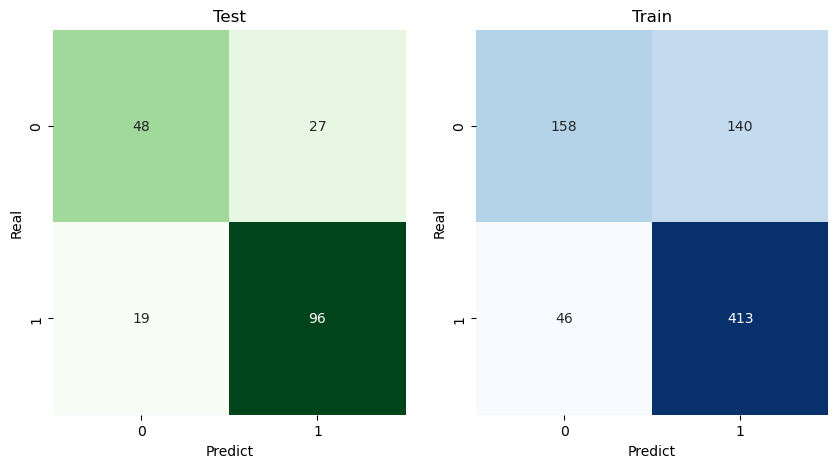

In [72]:
from sklearn.metrics import confusion_matrix

y_true_train = df_train['hight_traffic_target']
y_pred_train = df_train['Clas_1'] 

confusion_test = confusion_matrix(y_true, y_pred)
confusion_train = confusion_matrix(y_true_train, y_pred_train)

fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

# Luego indico lo que voy a dibujar en el primer cuadrante
sns.heatmap(confusion_test, 
            annot=True, fmt='d', cmap='Greens', cbar=False, 
            ax=ax[0])
ax[0].set_title('Test')
ax[0].set_xlabel('Predict')
ax[0].set_ylabel('Real')

# Luego indico lo que voy a dibujar en el segundo cuadrante
sns.heatmap(confusion_train, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[1])
ax[1].set_title('Train')
ax[1].set_xlabel('Predict')
ax[1].set_ylabel('Real')

# Muestra
plt.show()

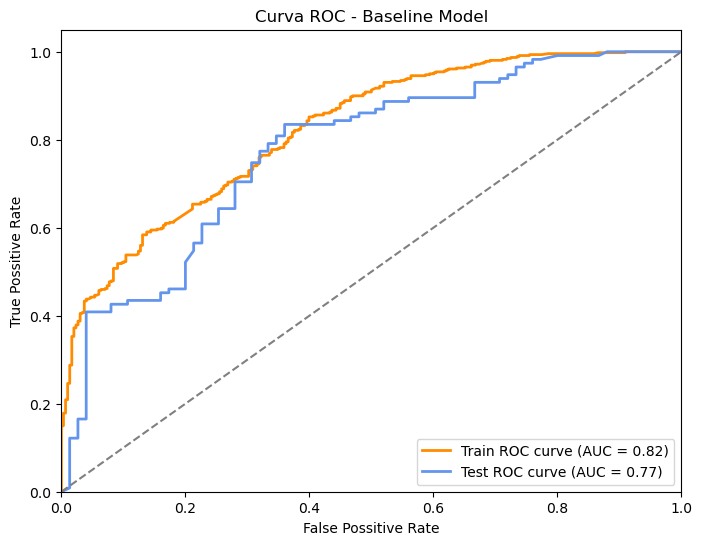

In [73]:
# ROC Curve and AUC
y_train = df_train['hight_traffic_target']
y_train_proba = df_train['Pred_1']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df_test['hight_traffic_target']
y_test_proba = df_test['Pred_1']
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Possitive Rate')
plt.ylabel('True Possitive Rate')
plt.title('Curva ROC - Baseline Model')
plt.legend(loc='lower right')
roc_1 = plt.gcf()
plt.show()

## Comparative Model

In [74]:
y_true = df_test['hight_traffic_target']
y_pred = df_test['Clas_2'] 

accuracy_2 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy_2)

recall_2 = recall_score(y_true, y_pred)
print("Recall:", recall_2)

f1_2 = f1_score(y_true, y_pred)
print("F1 score:", f1_2)

Accuracy: 0.7578947368421053
Recall: 0.7478260869565218
F1 score: 0.7889908256880733


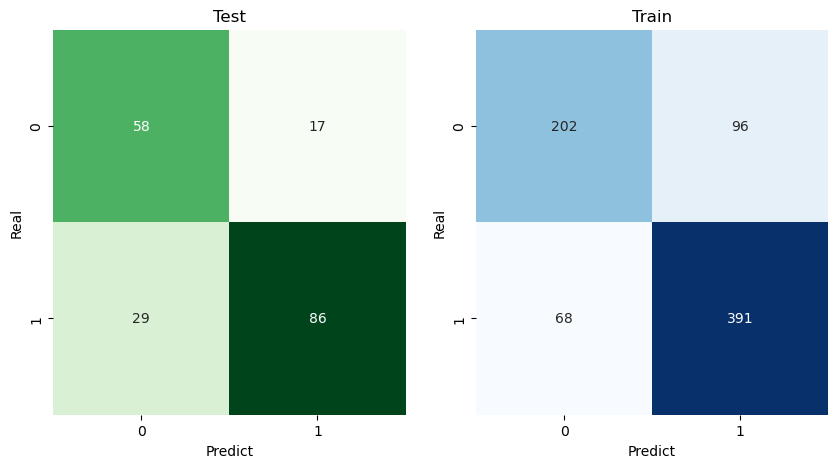

In [75]:
y_true_train = df_train['hight_traffic_target']
y_pred_train = df_train['Clas_2'] 

confusion_test = confusion_matrix(y_true, y_pred)
confusion_train = confusion_matrix(y_true_train, y_pred_train)

fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

# Luego indico lo que voy a dibujar en el primer cuadrante
sns.heatmap(confusion_test, 
            annot=True, fmt='d', cmap='Greens', cbar=False, 
            ax=ax[0])
ax[0].set_title('Test')
ax[0].set_xlabel('Predict')
ax[0].set_ylabel('Real')

# Luego indico lo que voy a dibujar en el segundo cuadrante
sns.heatmap(confusion_train, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[1])
ax[1].set_title('Train')
ax[1].set_xlabel('Predict')
ax[1].set_ylabel('Real')

# Muestra
plt.show()

# Business Metrics
The business metrics that will be used are:

- Percentage of predictions labeled as "high traffic"
- Prediction error rate as a percentage of recipes identified as potential high traffic that ultimately were not
- Prediction error rate by category

In [76]:
# Calculate predictions in all dataset

df = df.merge(rate_category[['category','rate_category']],
              left_on = 'category',
              right_on = 'category',
              how = 'left')

# calories_log
df['calories_LOG'] = np.log(df['calories'])

# carbohydrate_log
df['carbohydrate_LOG'] = np.log(df['carbohydrate'])

# sugar_log
df['sugar_LOG'] = np.log(df['sugar'])

# protein_log
df['protein_LOG'] = np.log(df['protein'])

# calories_servings
df['calories_servings'] = df['calories'] / df_train['servings']

# carbohydrate_servings
df['carbohydrate_servings'] = df['carbohydrate'] / df_train['servings']

# category_vegetable
df['category_vegetable'] = np.where(df['category'] == 'Vegetable',1,0)

# category_Potato
df['category_Potato'] = np.where(df['category'] == 'Potato',1,0)

# category_Pork
df['category_Pork'] = np.where(df['category'] == 'Pork',1,0)

# category_Meat
df['category_Meat'] = np.where(df['category'] == 'Meat',1,0)

# category_Dessert
df['category_Dessert'] = np.where(df['category'] == 'Dessert',1,0)

# category_Chicken
df['category_Chicken'] = np.where(df['category'] == 'Chicken',1,0)

# category_Breakfast
df['category_Breakfast'] = np.where(df['category'] == 'Breakfast',1,0)

# category_Beverages
df['category_Beverages'] = np.where(df['category'] == 'Beverages',1,0)

# category_LunchSnacks
df['category_LunchSnacks'] = np.where(df['category'] == 'Lunch/Snacks',1,0)

# category_OneDishMeal
df['category_OneDishMeal'] = np.where(df['category'] == 'One Dish Meal',1,0)

# servings_more_6
df['servings_more_6'] = np.where(df['servings'] >= 6,1,0)

C:\Users\usernosis\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Percentage of predictions labeled as "high traffic"

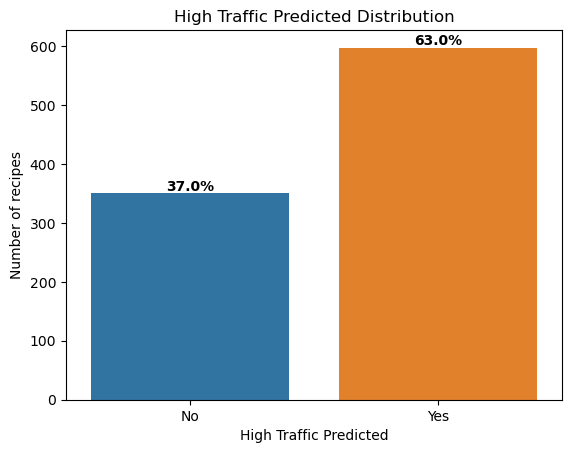

In [77]:
# Predictions Distribution
X = df[['rate_category','calories_LOG','carbohydrate_LOG', 'sugar_LOG', 'protein_LOG',
       'calories_servings', 'carbohydrate_servings', 'category_vegetable',
       'category_Potato', 'category_Pork', 'category_Meat', 'category_Dessert',
       'category_Chicken', 'category_Breakfast', 'category_Beverages',
       'category_LunchSnacks', 'category_OneDishMeal', 'servings_more_6','calories', 'carbohydrate', 'sugar', 'protein',
       'servings']]
df['HT_Prediced'] = model_xgb.predict(X)

cantidad = len(df['HT_Prediced'])

sns.countplot(data = df,
              x = "HT_Prediced")
plt.xlabel('High Traffic Predicted')
plt.ylabel('Number of recipes')
plt.title('High Traffic Predicted Distribution')
valores_x_originales = [0,1]
valores_x_nuevos = ['No', 'Yes']
plt.xticks(valores_x_originales, valores_x_nuevos)
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

## Prediction error rate 

In [78]:
df_HT = df.loc[df['HT_Prediced'] == 1,]
error = np.where(df_HT['hight_traffic_target'] == 0,1,0)
pred_error_rate = sum(error) / sum(df_HT['HT_Prediced'])
print('Prediction error rate:')
print(str(round(pred_error_rate,4)*100) + ' %')

Prediction error rate:
19.6 %


## Prediction error rate by category

In [79]:
df_HT = df.loc[df['HT_Prediced'] == 1,]
df_HT['error'] = np.where(df_HT['hight_traffic_target'] == 0,1,0)
df_HT.groupby('category').agg(     
    Error_Rate = ('error', 'mean')
).round(4).sort_values('Error_Rate',ascending = False)

C:\Users\usernosis\AppData\Local\Temp\ipykernel_23528\3583451119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HT['error'] = np.where(df_HT['hight_traffic_target'] == 0,1,0)


,Error_Rate
category,
Dessert,0.3614
Lunch/Snacks,0.3596
One Dish Meal,0.2676
Meat,0.2532
Chicken Breast,0.1579
Pork,0.0833
Potato,0.0568
Vegetable,0.0120
Chicken,0.0000


# Final summary
- If the selected model (comparative model) is used to determine whether a recipe will have high traffic or not, it will classify an equal amount of recipes as "high traffic" as those that have actually had this characteristic (close to 60%).
- Of the recipes classified as high traffic, on average, 20% ultimately are not. In other words, 80% of the recipes classified by the model will indeed be high traffic.
- When evaluated by category, the Dessert and Lunch/Snacks categories exhibit the highest estimation error, suggesting the need to further improve predictions in those categories.